In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, auc
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize

# Path to your saved checkpoint
checkpoint_path = 'c:/users/butech/Downloads/checkpoint_saved_efficientnetb6.keras'

# Load the saved model from the checkpoint
best_model = load_model(checkpoint_path)

# Compile the model again, as it needs to be compiled before training
best_model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Continue training from the last saved epoch
history = best_model.fit(
    train_dataset,
    epochs=25,  # Adjust the number of epochs as needed
    validation_data=val_dataset,
    initial_epoch=history.epoch[-1] if 'history' in locals() else 0,  # Resume from the last epoch
    callbacks=[checkpoint_callback, lr_schedule]
)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the trained model on the validation set
y_true = []
y_pred = []

for images, labels in val_dataset:
    preds = best_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print metrics (accuracy, loss) on validation set
val_loss, val_acc = best_model.evaluate(val_dataset)
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss: {val_loss:.4f}")

# F1 Score Calculation
f1 = f1_score(y_true, y_pred, average='weighted')  # Weighted to account for class imbalance
print(f"F1 Score: {f1:.4f}")

# ROC Curve Calculation
y_true_bin = label_binarize(y_true, classes=np.arange(len(class_names)))  # One-hot encode true labels
y_pred_prob = best_model.predict(val_dataset).reshape(-1, len(class_names))  # Get predicted probabilities for each class

# Compute ROC curve and AUC for each class
fpr, tpr, thresholds = roc_curve(y_true_bin.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (no discrimination)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


No history found. Starting a fresh training session...


NameError: name 'train_dataset' is not defined

In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf

# Recreate the training and validation datasets
train_dir = "c:/users/butech/Downloads/image_dataset_3labeled/train"
val_dir = "c:/users/butech/Downloads/image_dataset_3labeled/validation"

train_dataset_raw = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

val_dataset_raw = image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False
)

# Normalize and augment the data (reuse the preprocessing function)
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset_raw.map(preprocess)
val_dataset = val_dataset_raw.map(lambda image, label: (tf.cast(image, tf.float32) / 255.0, label))

# Prefetch datasets for better performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)


Found 14876 files belonging to 3 classes.
Found 3620 files belonging to 3 classes.


In [3]:
from tensorflow.keras.models import load_model

checkpoint_path = 'c:/users/butech/Downloads/checkpoint_saved_efficientnetb6.keras'
best_model = load_model(checkpoint_path)


In [4]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)


import json

class SaveHistoryCallback(tf.keras.callbacks.Callback):
    def __init__(self, history_path):
        super(SaveHistoryCallback, self).__init__()
        self.history_path = history_path
        self.history = {}

    def on_epoch_end(self, epoch, logs=None):
        # Update history with logs
        for key, value in logs.items():
            self.history.setdefault(key, []).append(value)
        # Save history to file
        with open(self.history_path, 'w') as f:
            json.dump(self.history, f)
# Path to save the training history
history_path = 'c:/users/butech/Downloads/history_efficientnetb6.json'

# Create the callback
save_history_callback = SaveHistoryCallback(history_path)

# Train the model
history = model.fit(
    train_dataset,
    epochs=70,
    validation_data=val_dataset,
    callbacks=[checkpoint_callback, lr_schedule, save_history_callback]
)


NameError: name 'model' is not defined

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import json

# 1. Define or Load the Model
model = tf.keras.applications.EfficientNetB6(
    include_top=True,
    weights=None,  # Replace 'imagenet' if using pretrained weights
    input_shape=(224, 224, 3),
    classes=1000
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 2. Load Datasets
# Assume train_dataset and val_dataset are defined elsewhere
# Example:
# train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(32)
# val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(32)

# 3. Define Callbacks
checkpoint_path = 'c:/users/butech/Downloads/checkpoint_efficientnetb6.keras'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

# Save history callback
class SaveHistoryCallback(tf.keras.callbacks.Callback):
    def __init__(self, history_path):
        super(SaveHistoryCallback, self).__init__()
        self.history_path = history_path
        self.history = {}

    def on_epoch_end(self, epoch, logs=None):
        # Update history with logs
        for key, value in logs.items():
            self.history.setdefault(key, []).append(value)
        # Save history to file
        with open(self.history_path, 'w') as f:
            json.dump(self.history, f)

# Path to save the training history
history_path = 'c:/users/butech/Downloads/history_efficientnetb6.json'
save_history_callback = SaveHistoryCallback(history_path)

# Learning rate scheduler (example)
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)


lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

# 4. Train the Model
history = model.fit(
    train_dataset,
    epochs=25,
    validation_data=val_dataset,
    callbacks=[checkpoint_callback, lr_callback, save_history_callback]
)

# 5. Visualize Results
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


Epoch 1/25


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import itertools
import json

# 1. Define or Load the Model
model = tf.keras.applications.EfficientNetB6(
    include_top=True,
    weights=None,  # Replace 'imagenet' if using pretrained weights
    input_shape=(224, 224, 3),
    classes=1000
)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 2. Load Datasets
# Assume train_dataset and val_dataset are defined elsewhere

# Example (replace with actual datasets):
# train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).batch(32)
# val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels)).batch(32)

# 3. Define Callbacks
checkpoint_path = 'c:/users/butech/Downloads/checkpoint_efficientnetb6.keras'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

class SaveHistoryCallback(tf.keras.callbacks.Callback):
    def __init__(self, history_path):
        super(SaveHistoryCallback, self).__init__()
        self.history_path = history_path
        self.history = {}

    def on_epoch_end(self, epoch, logs=None):
        for key, value in logs.items():
            self.history.setdefault(key, []).append(value)
        with open(self.history_path, 'w') as f:
            json.dump(self.history, f)

history_path = 'c:/users/butech/Downloads/history_efficientnetb6.json'
save_history_callback = SaveHistoryCallback(history_path)

# 4. Use ReduceLROnPlateau for dynamic learning rate adjustment
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',  # Monitor validation accuracy
    factor=0.5,  # Reduce LR by a factor of 0.5
    patience=3,  # Wait for 3 epochs with no improvement
    min_lr=1e-6,  # Minimum learning rate
    verbose=1
)

# 5. Train the Model
history = model.fit(
    train_dataset,
    epochs=25,
    validation_data=val_dataset,
    callbacks=[checkpoint_callback, lr_schedule, save_history_callback]
)

# 6. Visualize Training Progress
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# 7. Evaluate the Model
# Assume validation data is small enough to fit in memory
val_images, val_labels = zip(*list(val_dataset.unbatch().as_numpy_iterator()))
val_images = np.array(val_images)
val_labels = np.array(val_labels)

# Predictions
predictions = model.predict(val_images)
predicted_classes = np.argmax(predictions, axis=1)

# 8. Confusion Matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()

# Confusion Matrix
cm = confusion_matrix(val_labels, predicted_classes)
plot_confusion_matrix(cm, classes=range(1000), title='Confusion Matrix')
plt.show()

# 9. Classification Report
print("Classification Report:")
print(classification_report(val_labels, predicted_classes))

# 10. ROC Curve
# Convert labels to one-hot encoding for ROC curve calculation
val_labels_onehot = tf.keras.utils.to_categorical(val_labels, num_classes=1000)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(1000):  # Change range to match your number of classes
    fpr[i], tpr[i], _ = roc_curve(val_labels_onehot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for the first few classes
plt.figure(figsize=(10, 8))
for i in range(min(10, 1000)):  # Plot ROC for up to 10 classes
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC: {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Selected Classes')
plt.legend(loc='best')
plt.show()


Epoch 1/25


Found 14876 files belonging to 3 classes.
Found 3620 files belonging to 3 classes.
115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step
Epoch 1/35
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.3661 - loss: 1.1032
Epoch 1: val_accuracy improved from -inf to 0.54586, saving model to c:/users/butech/Downloads/checkpoint_saved_efficientnetb5.keras
465/465 ━━━━━━━━━━━━━━━━━━━━ 4050s 8s/step - accuracy: 0.3662 - loss: 1.1031 - val_accuracy: 0.5459 - val_loss: 0.9865 - learning_rate: 1.0000e-05
Epoch 2/35
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5162 - loss: 0.9748
Epoch 2: val_accuracy improved from 0.54586 to 0.64807, saving model to c:/users/butech/Downloads/checkpoint_saved_efficientnetb5.keras
465/465 ━━━━━━━━━━━━━━━━━━━━ 3883s 8s/step - accuracy: 0.5163 - loss: 0.9747 - val_accuracy: 0.6481 - val_loss: 0.7725 - learning_rate: 1.0000e-05
Epoch 3/35
465/465 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.5827 - loss: 0.8628
Epoch 3: val_accuracy improved from 0.64807 t

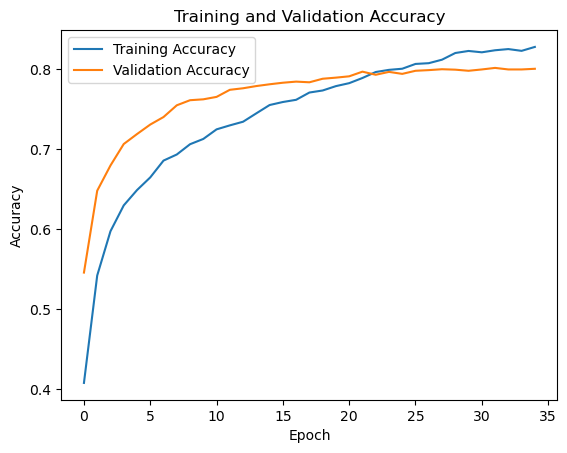

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2

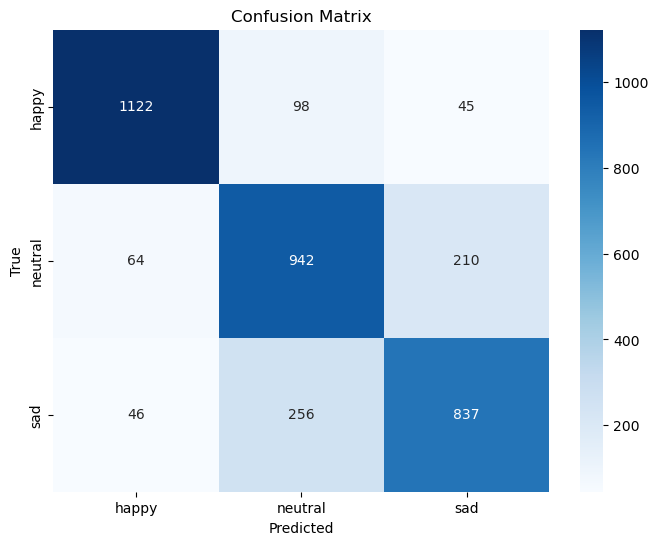

NameError: name 'val_labels' is not defined

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB5
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Path to your dataset
train_dir = "c:/users/butech/Downloads/image_dataset_3labeled/train"
val_dir = "c:/users/butech/Downloads/image_dataset_3labeled/validation"

# Load datasets
train_dataset_raw = image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

val_dataset_raw = image_dataset_from_directory(
    val_dir,
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(224, 224),
    shuffle=False
)

# Get class names
class_names = train_dataset_raw.class_names

# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.1)
])

# Normalize and apply data augmentation
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = data_augmentation(image, training=True)
    return image, label

train_dataset = train_dataset_raw.map(preprocess)
val_dataset = val_dataset_raw.map(lambda image, label: (tf.cast(image, tf.float32) / 255.0, label))

# Prefetch datasets for performance
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Load EfficientNetB3 model with pre-trained weights
base_model = EfficientNetB5(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Initially freeze the base model

# Add custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Callbacks
checkpoint_path = 'c:/users/butech/Downloads/checkpoint_saved_efficientnetb5.keras'
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    save_best_only=True,
    mode='max',
    verbose=1
)

lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

class SaveHistoryCallback(tf.keras.callbacks.Callback):
    def __init__(self, history_path):
        super(SaveHistoryCallback, self).__init__()
        self.history_path = history_path
        self.history = {}

    def on_epoch_end(self, epoch, logs=None):
        for key, value in logs.items():
            self.history.setdefault(key, []).append(value)
        with open(self.history_path, 'w') as f:
            json.dump(self.history, f)
# Fine-tuning: Unfreeze some layers of the base model
base_model.trainable = True
for layer in base_model.layers[:100]:  # Adjust the number of frozen layers based on dataset size
    layer.trainable = False

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the fine-tuned model for 70 epochs
history = model.fit(
    train_dataset,
    epochs=35,
    validation_data=val_dataset,
    callbacks=[checkpoint_callback, lr_schedule]
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Load the best model
best_model = tf.keras.models.load_model(checkpoint_path)

# Evaluate on validation dataset
y_true = []
y_pred = []

for images, labels in val_dataset:
    preds = best_model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Convert labels to one-hot encoding for ROC curve calculation
val_labels_onehot = tf.keras.utils.to_categorical(val_labels, num_classes=1000)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(1000):  # Change range to match your number of classes
    fpr[i], tpr[i], _ = roc_curve(val_labels_onehot[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
# Plot ROC Curve for the first few classes
plt.figure(figsize=(10, 8))
for i in range(min(10, 1000)):  # Plot ROC for up to 10 classes
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC: {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Selected Classes')
plt.legend(loc='best')
plt.show()

In [4]:
from sklearn.metrics import f1_score

# Calculate F1 score
f1 = f1_score(y_true, y_pred, average='weighted')  # 'weighted' handles class imbalance
print(f"Weighted F1 Score: {f1:.4f}")


Weighted F1 Score: 0.8021


In [5]:
f1_per_class = f1_score(y_true, y_pred, average=None)  # Per-class F1 scores
for idx, score in enumerate(f1_per_class):
    print(f"F1 Score for Class {class_names[idx]}: {score:.4f}")


F1 Score for Class happy: 0.8987
F1 Score for Class neutral: 0.7500
F1 Score for Class sad: 0.7503
